Aproximación de la raíz: 3.0
Número de iteraciones realizadas: 1


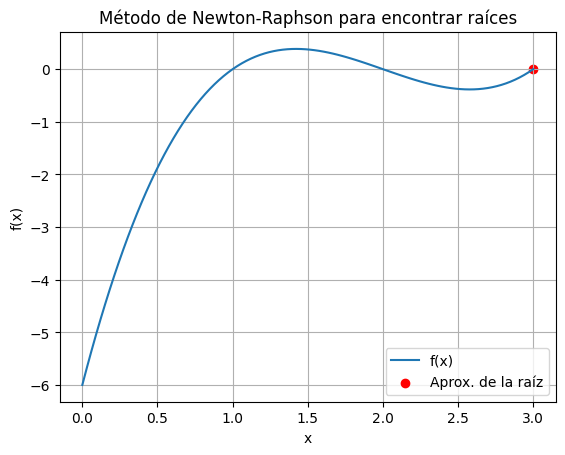

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

def newton_raphson_method(func, x0, tol=1e-6, max_iter=100):
    """
    Método de Newton-Raphson para encontrar una raíz de la ecuación.

    :param func: La función para la cual encontrar la raíz.
    :param x0: Aproximación inicial.
    :param tol: Tolerancia para la convergencia.
    :param max_iter: Número máximo de iteraciones.
    :return: Aproximación de la raíz, número de iteraciones realizadas.
    """
    x = sp.symbols('x')
    derivative = sp.diff(func, x)
    func_lambdified = sp.lambdify(x, func, 'numpy')
    derivative_lambdified = sp.lambdify(x, derivative, 'numpy')

    x_n = x0
    iter_count = 0

    while abs(func_lambdified(x_n)) > tol and iter_count < max_iter:
        x_n = x_n - func_lambdified(x_n) / derivative_lambdified(x_n)
        iter_count += 1

    return x_n, iter_count

# Ejemplo de uso:
if __name__ == "__main__":
    # Definir la función y la aproximación inicial
    x = sp.symbols('x')
    func = x**3 - 6*x**2 + 11*x - 6
    initial_approximation = 1.5

    # Aplicar el método de Newton-Raphson
    root, iterations = newton_raphson_method(func, initial_approximation)

    # Mostrar resultados
    print(f"Aproximación de la raíz: {root}")
    print(f"Número de iteraciones realizadas: {iterations}")

    # Crear gráfico de la función y la raíz encontrada
    x_values = np.linspace(0, 3, 100)
    func_values = x_values**3 - 6*x_values**2 + 11*x_values - 6

    plt.plot(x_values, func_values, label="f(x)")
    plt.scatter(root, 0, color='red', label='Aprox. de la raíz')
    plt.title("Método de Newton-Raphson para encontrar raíces")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()
